2025-09-16 13:11:50.186081: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758028310.363871      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758028310.416618      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Class Weights: {0: 1.0811258278145695, 1: 1.0659981343283582, 2: 0.8955721003134797, 3: 0.9800600343053173}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1758028325.563260      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60


I0000 00:00:1758028332.593218     116 service.cc:148] XLA service 0x7d2698005df0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758028332.594155     116 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1758028333.103162     116 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/143 ━━━━━━━━━━━━━━━━━━━━ 21:14 9s/step - accuracy: 0.2188 - loss: 3.1098

I0000 00:00:1758028336.526754     116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


143/143 ━━━━━━━━━━━━━━━━━━━━ 65s 397ms/step - accuracy: 0.4066 - loss: 2.4753 - val_accuracy: 0.4733 - val_loss: 2.4783 - learning_rate: 3.0000e-04
Epoch 2/60
143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 249ms/step - accuracy: 0.5524 - loss: 2.0003 - val_accuracy: 0.6363 - val_loss: 1.8761 - learning_rate: 3.0000e-04
Epoch 3/60
143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 252ms/step - accuracy: 0.5524 - loss: 1.9399 - val_accuracy: 0.6626 - val_loss: 1.7639 - learning_rate: 3.0000e-04
Epoch 4/60
143/143 ━━━━━━━━━━━━━━━━━━━━ 35s 245ms/step - accuracy: 0.5554 - loss: 1.8419 - val_accuracy: 0.6512 - val_loss: 1.7448 - learning_rate: 3.0000e-04
Epoch 5/60
143/143 ━━━━━━━━━━━━━━━━━━━━ 35s 245ms/step - accuracy: 0.5636 - loss: 1.8023 - val_accuracy: 0.6486 - val_loss: 1.6807 - learning_rate: 3.0000e-04
Epoch 6/60
143/143 ━━━━━━━━━━━━━━━━━━━━ 35s 248ms/step - accuracy: 0.5998 - loss: 1.6864 - val_accuracy: 0.6687 - val_loss: 1.6116 - learning_rate: 3.0000e-04
Epoch 7/60
143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 249ms/step - 

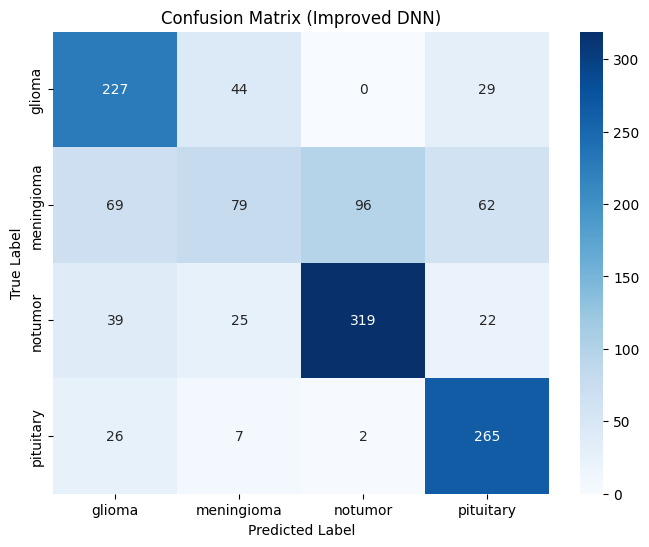


Classification Report (Improved DNN):

              precision    recall  f1-score   support

      glioma       0.63      0.76      0.69       300
  meningioma       0.51      0.26      0.34       306
     notumor       0.76      0.79      0.78       405
   pituitary       0.70      0.88      0.78       300

    accuracy                           0.68      1311
   macro avg       0.65      0.67      0.65      1311
weighted avg       0.66      0.68      0.66      1311


📌 Statistical Significance:
P-Value (sci): 2.581e-233
P-Value (high precision): 2.5811553306151258185655216596345526945607212775051690720552565211443897174738150710374488846805619095539566555555497557575166344806917384030943167851797315986234567335018085333551979560649069333795912477910572714906921951762501191509146019750403393861395513649629657054121398575320475821676259134603794216641261119932019908190873794028056355868375890344046283171325984762945677101153315774348656849148675405862758654090813546359626825879222437

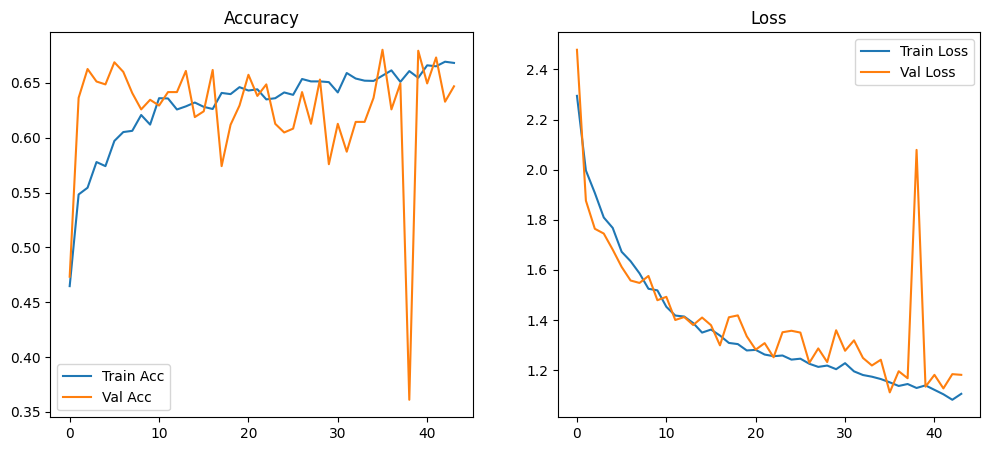


⚙️ Hyperparameters Used:
Learning Rate: 0.0003
Batch Size: 32
Epochs: 60
Hidden Layer Sizes: [512, 256, 128, 64]


In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, precision_score, recall_score, f1_score, accuracy_score
from scipy.stats import binomtest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from decimal import Decimal, getcontext

# =====================
# Dataset Paths
# =====================
DATA_DIR = "/kaggle/input/brain-tumor-mri-dataset"
train_dir = os.path.join(DATA_DIR, "Training")
test_dir = os.path.join(DATA_DIR, "Testing")

# =====================
# Parameters (Hyperparameters)
# =====================
IMG_SIZE = 150
BATCH_SIZE = 32
EPOCHS = 60   # more epochs with early stopping
LR = 0.0003   # slightly lower LR for stability
HIDDEN_LAYERS = [512, 256, 128, 64]  # compact progressive layers

# =====================
# Data Generators with Augmentation
# =====================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# =====================
# Compute Class Weights
# =====================
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_gen.classes),
    y=train_gen.classes
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# =====================
# Improved DNN Model
# =====================
model = Sequential([
    Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),

    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(train_gen.num_classes, activation='softmax')
])

opt = Adam(learning_rate=LR)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# =====================
# Training
# =====================
callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=callbacks,
    class_weight=class_weights,
    verbose=1
)

# =====================
# Evaluation
# =====================
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Metrics
acc = accuracy_score(y_true, y_pred_classes)
prec = precision_score(y_true, y_pred_classes, average='macro')
rec = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')
ck = cohen_kappa_score(y_true, y_pred_classes)

correct = np.sum(y_pred_classes == y_true)
total = len(y_true)
p_value = binomtest(correct, total, p=1/len(class_labels), alternative='greater').pvalue

# Set high precision for p-value
getcontext().prec = 50

print("\n📊 Evaluation Metrics (Improved DNN):")
print(f"Accuracy: {acc*100:.2f}%")
print(f"Precision (Macro): {prec*100:.2f}%")
print(f"Recall (Macro): {rec*100:.2f}%")
print(f"F1 Score (Macro): {f1*100:.2f}%")
print(f"Cohen's Kappa Score: {ck:.4f}")
print(f"P-Value (sci): {p_value:.3e}")
print("P-Value (high precision):", Decimal(p_value))
print("Note: Results are statistically significant (p < 0.001).")

# =====================
# Confusion Matrix + Report
# =====================
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Confusion Matrix (Improved DNN)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

print("\nClassification Report (Improved DNN):\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# add p-value summary under classification report
print("\n📌 Statistical Significance:")
print(f"P-Value (sci): {p_value:.3e}")
print("P-Value (high precision):", Decimal(p_value))
print("Note: Results are statistically significant (p < 0.001).")

# =====================
# Per-Class Accuracy
# =====================
print("\nPer-Class Accuracy:")
for i, label in enumerate(class_labels):
    class_acc = np.mean(y_pred_classes[y_true == i] == y_true[y_true == i])
    print(f"{label}: {class_acc*100:.2f}%")

# =====================
# Accuracy & Loss Plots
# =====================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss")
plt.show()

# =====================
# Print Hyperparameters
# =====================
print("\n⚙️ Hyperparameters Used:")
print(f"Learning Rate: {LR}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Epochs: {EPOCHS}")
print(f"Hidden Layer Sizes: {HIDDEN_LAYERS}")
